<a href="https://colab.research.google.com/github/kwarc-agat/forest-cover/blob/main/forest_data_exploring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#changing the working directory

%cd /content/drive/MyDrive/Kaggle/Forest-Cover-Type-Prediction/

/content/drive/MyDrive/Kaggle/Forest-Cover-Type-Prediction


In [ ]:
# unzipping your data
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [4]:
# imports

from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Explore data

In [5]:
train_data_path = "train.csv"

forest_data = pd.read_csv(train_data_path)
forest_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [6]:
forest_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [7]:
X = forest_data.copy()
y = X.pop("Cover_Type")

Compressing one-hot encoded soils to single column

In [8]:
soils_cols = [col for col in X if col.startswith('Soil')]
soils_df = forest_data[soils_cols]
soils_df

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15116,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15117,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15118,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
def get_soil(row):
  for c in soils_df.columns:
    if row[c]==1:
      return int(c.replace("Soil_Type", ""))

soils_series = soils_df.apply(get_soil, axis=1)

In [10]:
X['Soil_Type'] = soils_series
X = X.drop(soils_cols, axis=1)
X.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,29
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,29
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,12
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,30
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,29


Compressing one-hot encoded Wilderness Area to single column

In [11]:
area_cols = [col for col in X if col.startswith('Wilderness_Area')]
area_df = forest_data[area_cols]
area_df

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
15115,0,0,1,0
15116,0,0,1,0
15117,0,0,1,0
15118,0,0,1,0


In [12]:
def get_area(row):
  for c in area_df.columns:
    if row[c]==1:
      return int(c.replace("Wilderness_Area", ""))

area_series = area_df.apply(get_area, axis=1)

In [13]:
X['Wilderness_Area'] = area_series
X = X.drop(area_cols, axis=1)
X

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,1,2596,51,3,258,0,510,221,232,148,6279,29,1
1,2,2590,56,2,212,-6,390,220,235,151,6225,29,1
2,3,2804,139,9,268,65,3180,234,238,135,6121,12,1
3,4,2785,155,18,242,118,3090,238,238,122,6211,30,1
4,5,2595,45,2,153,-1,391,220,234,150,6172,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,1282,4,3
15116,15117,2603,121,19,633,195,618,249,221,91,1325,4,3
15117,15118,2492,134,25,365,117,335,250,220,83,1187,4,3
15118,15119,2487,167,28,218,101,242,229,237,119,932,4,3


Drop Id column - not a feature

In [14]:
X = X.drop(columns=['Id'])
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,4,3
15116,2603,121,19,633,195,618,249,221,91,1325,4,3
15117,2492,134,25,365,117,335,250,220,83,1187,4,3
15118,2487,167,28,218,101,242,229,237,119,932,4,3


## Mutual Information

In [15]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

In [16]:
mi_scores

Elevation                             0.788080
Soil_Type                             0.570390
Wilderness_Area                       0.513242
Horizontal_Distance_To_Roadways       0.226251
Horizontal_Distance_To_Fire_Points    0.158060
Hillshade_9am                         0.096727
Hillshade_3pm                         0.063911
Slope                                 0.061678
Horizontal_Distance_To_Hydrology      0.060657
Hillshade_Noon                        0.037379
Aspect                                0.029263
Vertical_Distance_To_Hydrology        0.024584
Name: MI Scores, dtype: float64

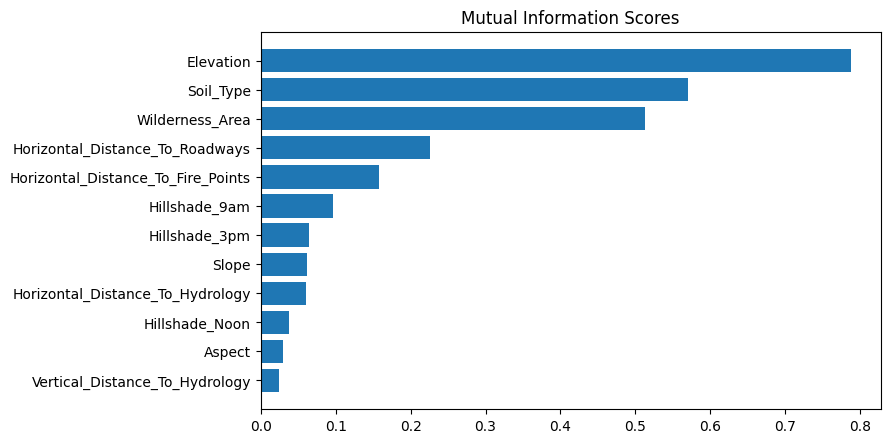

In [17]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Principal Component Analysis

In [18]:
X_scaled_pca = (X - X.mean(axis=0)) / X.std(axis=0)

pca = PCA()
X_pca = pca.fit_transform(X_scaled_pca)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,2.477160,0.887175,-1.660365,0.190422,2.349859,3.298139,-0.042280,-0.859347,0.150063,-0.027898,0.851905,0.062460
1,2.443291,0.750880,-1.910634,0.203066,2.264236,3.342311,-0.078044,-0.860535,0.220926,-0.112753,0.827386,0.096655
2,2.788295,0.738386,-0.842181,-0.032486,3.583020,1.160188,-0.717273,-0.123105,0.131628,-0.188991,-0.034981,0.004964
3,3.022746,1.156629,0.205505,0.485688,3.116338,0.988679,-1.210236,-0.488893,1.057539,-0.550648,0.888736,-0.010663
4,2.358213,0.825166,-1.997278,0.289196,2.230608,3.306477,-0.030575,-0.805695,0.370424,-0.308822,0.762260,0.096627


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74d833d350>,
      dtype=object)

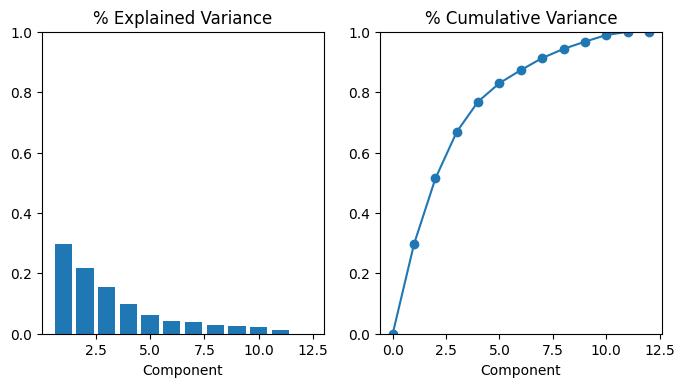

In [19]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca)

In [20]:
make_mi_scores(X_pca, y)

PC1     0.650581
PC5     0.230388
PC8     0.179602
PC6     0.163120
PC11    0.134861
PC2     0.132624
PC7     0.068148
PC3     0.057060
PC4     0.056462
PC9     0.048328
PC10    0.023514
PC12    0.013386
Name: MI Scores, dtype: float64

Add PC columns with highest MI score

In [21]:
X["PC1"] = X_pca.PC1
X["PC5"] = X_pca.PC5

make_mi_scores(X, y)

Elevation                             1.009218
Soil_Type                             0.909761
PC1                                   0.650581
Wilderness_Area                       0.512290
Horizontal_Distance_To_Roadways       0.320511
PC5                                   0.230388
Horizontal_Distance_To_Fire_Points    0.207346
Horizontal_Distance_To_Hydrology      0.125135
Hillshade_9am                         0.111470
Aspect                                0.083069
Vertical_Distance_To_Hydrology        0.079252
Hillshade_3pm                         0.070788
Slope                                 0.070209
Hillshade_Noon                        0.029586
Name: MI Scores, dtype: float64

Remove columns with lowest MI score

In [22]:
X_smaller = X.drop(["Vertical_Distance_To_Hydrology", "Aspect", "Slope", "Hillshade_3pm", "Hillshade_Noon"], axis=1)
make_mi_scores(X_smaller, y)

Elevation                             1.016520
Soil_Type                             0.917244
PC1                                   0.650581
Wilderness_Area                       0.510718
Horizontal_Distance_To_Roadways       0.316422
PC5                                   0.230388
Horizontal_Distance_To_Fire_Points    0.198556
Horizontal_Distance_To_Hydrology      0.134069
Hillshade_9am                         0.117073
Name: MI Scores, dtype: float64

## Processed training dataframe

In [23]:
X = X_smaller
X.head()

,Elevation,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area,PC1,PC5
0,2596,258,510,221,6279,29,1,2.477160,2.349859
1,2590,212,390,220,6225,29,1,2.443291,2.264236
2,2804,268,3180,234,6121,12,1,2.788295,3.583020
3,2785,242,3090,238,6211,30,1,3.022746,3.116338
4,2595,153,391,220,6172,29,1,2.358213,2.230608
